In [1]:
print('hello world')

hello world


In [2]:
import pandas as pd

# Specify encoding to handle special characters
df = pd.read_csv(r"C:\Users\Ah San\Downloads\archive\Student_Performance.csv", 
                 encoding='utf-8')
print(df.head(5))

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0            NaN             99.0                        Yes          9.0   
1           19.0             82.0                         No          4.0   
2            8.0             51.0                        NaN          7.0   
3            5.0             52.0                        Yes          5.0   
4            7.0             75.0                         No          NaN   

   Sample Question Papers Practiced  Performance Index  
0                               1.0                 91  
1                               NaN                 65  
2                               2.0                 45  
3                             100.0                 36  
4                               5.0                 66  


In [3]:
print(df.tail(5))

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
9995            1.0             49.0                        Yes          4.0   
9996            7.0              NaN                        Yes          8.0   
9997            6.0             83.0                        NaN          8.0   
9998            NaN             97.0                        Yes          7.0   
9999           16.0             74.0                         No          8.0   

      Sample Question Papers Practiced  Performance Index  
9995                               2.0                 23  
9996                               5.0                 58  
9997                               NaN                 74  
9998                               0.0                 95  
9999                              87.0                 64  


In [4]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 10000, Columns: 6


In [5]:
print(df.dtypes)

Hours Studied                       float64
Previous Scores                     float64
Extracurricular Activities           object
Sleep Hours                         float64
Sample Question Papers Practiced    float64
Performance Index                     int64
dtype: object


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9971 non-null   float64
 1   Previous Scores                   9972 non-null   float64
 2   Extracurricular Activities        9998 non-null   object 
 3   Sleep Hours                       9971 non-null   float64
 4   Sample Question Papers Practiced  9970 non-null   float64
 5   Performance Index                 10000 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 468.9+ KB


#  Analyze Missing Data Pattern 

In [7]:
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())


       Hours Studied  Previous Scores  Sleep Hours  \
count    9971.000000      9972.000000  9971.000000   
mean        4.993381        69.442238     6.530037   
std         2.597730        17.345249     1.696292   
min         0.000000        40.000000     4.000000   
25%         3.000000        54.000000     5.000000   
50%         5.000000        69.000000     7.000000   
75%         7.000000        85.000000     8.000000   
max        19.000000        99.000000     9.000000   

       Sample Question Papers Practiced  Performance Index  
count                       9970.000000       10000.000000  
mean                           4.602608          55.224800  
std                            3.132855          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max                      

In [8]:
print("\nValue counts for Extracurricular Activities:")
print(df['Extracurricular Activities'].value_counts())


Value counts for Extracurricular Activities:
Extracurricular Activities
No        5045
Yes       4934
Asif         9
Ahsan        6
Ahsan        4
Name: count, dtype: int64


In [9]:
missing_values = df.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]
print(columns_with_missing)

Hours Studied                       29
Previous Scores                     28
Extracurricular Activities           2
Sleep Hours                         29
Sample Question Papers Practiced    30
dtype: int64


In [10]:
# Calculate percentage of missing data
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)

Hours Studied                       0.29
Previous Scores                     0.28
Extracurricular Activities          0.02
Sleep Hours                         0.29
Sample Question Papers Practiced    0.30
Performance Index                   0.00
dtype: float64


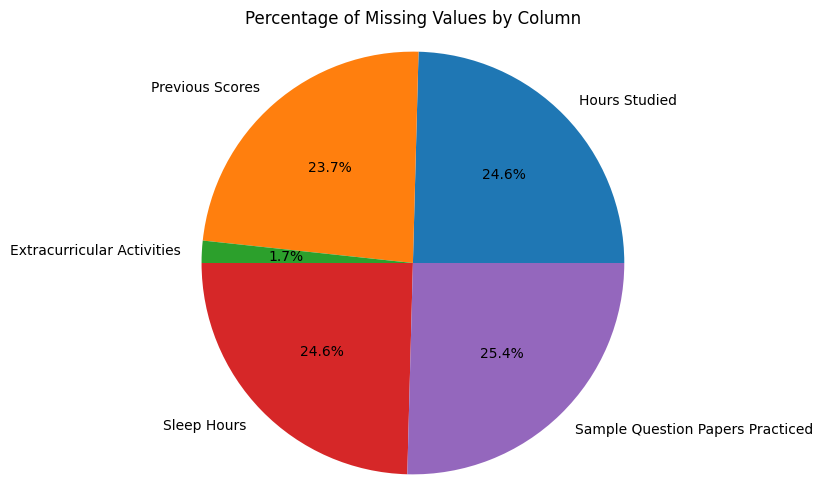

In [11]:
import matplotlib.pyplot as plt

# Use existing `missing_percentage` series and keep only columns with missing values
mp = missing_percentage[missing_percentage > 0]

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(mp, labels=mp.index, autopct='%1.1f%%', startangle=0, counterclock=True)
ax.set_title('Percentage of Missing Values by Column')
ax.axis('equal')  # keep pie circular
plt.show()

# Handling Missing Values

In [12]:
import pandas as pd

# Create a tabular view of missing values
missing_data = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})

print(missing_data)

                             Column  Missing Count  Missing Percentage
0                     Hours Studied             29                0.29
1                   Previous Scores             28                0.28
2        Extracurricular Activities              2                0.02
3                       Sleep Hours             29                0.29
4  Sample Question Papers Practiced             30                0.30
5                 Performance Index              0                0.00


In [13]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
print("Mean values:")
print(df.mean(numeric_only=True))
print("\nMedian values:")
print(df.median(numeric_only=True))

Mean values:
Hours Studied                        4.993381
Previous Scores                     69.442238
Sleep Hours                          6.530037
Sample Question Papers Practiced     4.602608
Performance Index                   55.224800
dtype: float64

Median values:
Hours Studied                        5.0
Previous Scores                     69.0
Sleep Hours                          7.0
Sample Question Papers Practiced     5.0
Performance Index                   55.0
dtype: float64


In [15]:
from sklearn.impute import KNNImputer

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# Apply KNN imputation to numeric columns
knn_imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = knn_imputer.fit_transform(df[numeric_cols])

# Verify missing values are filled
print("Missing values after KNN imputation:")
print(df.isnull().sum())

Missing values after KNN imputation:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          2
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [16]:
print("Mean values:")
print(df.mean(numeric_only=True))
print("\nMedian values:")
print(df.median(numeric_only=True))

Mean values:
Hours Studied                        4.99514
Previous Scores                     69.44600
Sleep Hours                          6.53044
Sample Question Papers Practiced     4.60440
Performance Index                   55.22480
dtype: float64

Median values:
Hours Studied                        5.0
Previous Scores                     69.0
Sleep Hours                          7.0
Sample Question Papers Practiced     5.0
Performance Index                   55.0
dtype: float64


In [17]:
# Fill missing values with median for each numeric column
#df.fillna(df.median(numeric_only=True), inplace=True)

# Verify missing values are filled
#print("Missing values after filling:")
#print(df.isnull().sum())

In [18]:
print(df)

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0               7.4             99.0                        Yes          9.0   
1              19.0             82.0                         No          4.0   
2               8.0             51.0                        NaN          7.0   
3               5.0             52.0                        Yes          5.0   
4               7.0             75.0                         No          6.2   
...             ...              ...                        ...          ...   
9995            1.0             49.0                        Yes          4.0   
9996            7.0             66.6                        Yes          8.0   
9997            6.0             83.0                        NaN          8.0   
9998            8.8             97.0                        Yes          7.0   
9999           16.0             74.0                         No          8.0   

      Sample Question Papers Practiced 

In [19]:
# Fill missing values in categorical column with mode (most frequent value)
df['Extracurricular Activities'].fillna(df['Extracurricular Activities'].mode()[0], inplace=True)

# Verify missing values are filled
print("Missing values after filling categorical data:")
print(df.isnull().sum())
print("\nExtracurricular Activities value counts:")
print(df['Extracurricular Activities'].value_counts())

Missing values after filling categorical data:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Extracurricular Activities value counts:
Extracurricular Activities
No        5047
Yes       4934
Asif         9
Ahsan        6
Ahsan        4
Name: count, dtype: int64


C:\Users\Ah San\AppData\Local\Temp\ipykernel_23804\3127318813.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Extracurricular Activities'].fillna(df['Extracurricular Activities'].mode()[0], inplace=True)


In [20]:
print(df)

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0               7.4             99.0                        Yes          9.0   
1              19.0             82.0                         No          4.0   
2               8.0             51.0                         No          7.0   
3               5.0             52.0                        Yes          5.0   
4               7.0             75.0                         No          6.2   
...             ...              ...                        ...          ...   
9995            1.0             49.0                        Yes          4.0   
9996            7.0             66.6                        Yes          8.0   
9997            6.0             83.0                         No          8.0   
9998            8.8             97.0                        Yes          7.0   
9999           16.0             74.0                         No          8.0   

      Sample Question Papers Practiced 

# Data Visualization

https://doc.dataiku.com/dss/latest/statistics/univariate.html

C:\Users\Ah San\AppData\Local\Temp\ipykernel_23804\449980681.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Extracurricular Activities', ax=axes[0, 1], palette='Set2')


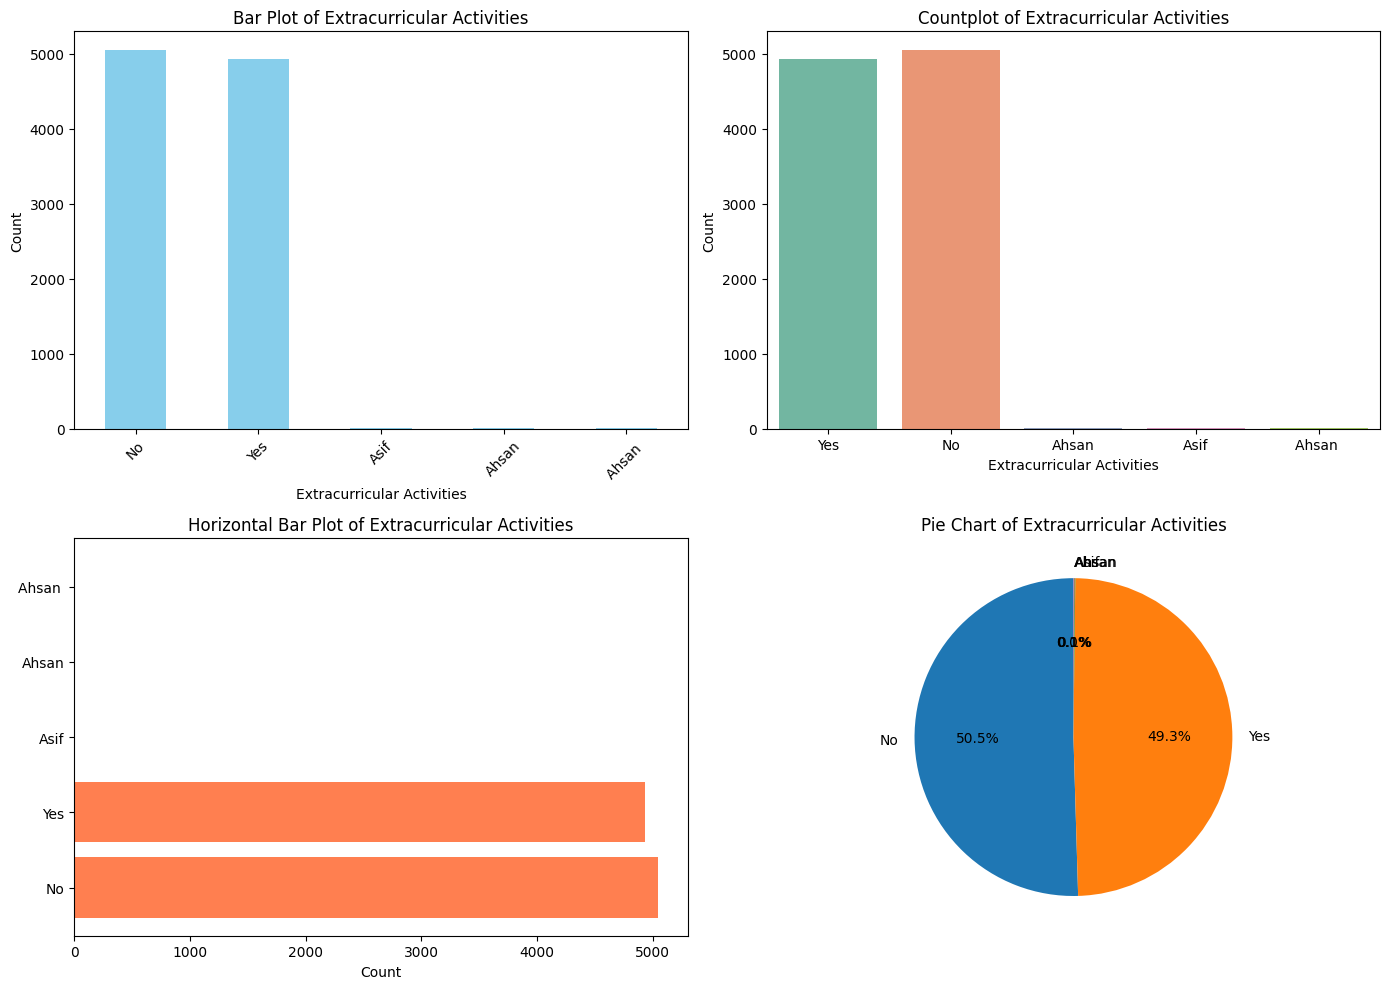

In [21]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Bar plot
df['Extracurricular Activities'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Bar Plot of Extracurricular Activities')
axes[0, 0].set_xlabel('Extracurricular Activities')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Countplot
sns.countplot(data=df, x='Extracurricular Activities', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Countplot of Extracurricular Activities')
axes[0, 1].set_xlabel('Extracurricular Activities')
axes[0, 1].set_ylabel('Count')

# 3. Stacked bar plot (showing proportion)
activity_counts = df['Extracurricular Activities'].value_counts()
axes[1, 0].barh(activity_counts.index, activity_counts.values, color='coral')
axes[1, 0].set_title('Horizontal Bar Plot of Extracurricular Activities')
axes[1, 0].set_xlabel('Count')

# 4. Pie chart
activity_counts.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Pie Chart of Extracurricular Activities')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

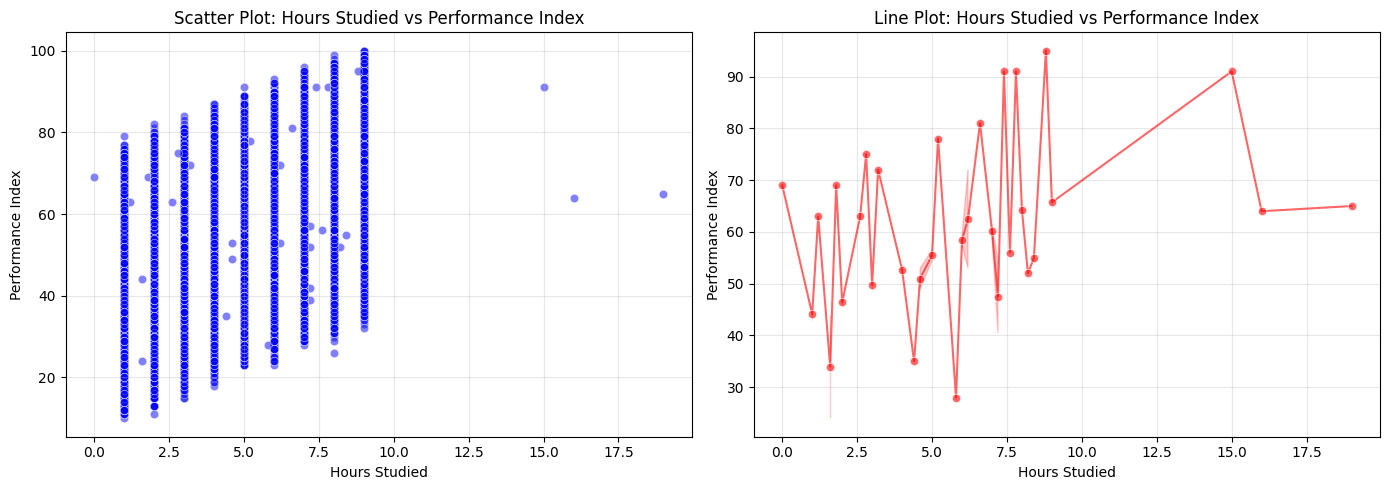

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot using seaborn
sns.scatterplot(data=df, x='Hours Studied', y='Performance Index', ax=axes[0], alpha=0.5, color='blue')
axes[0].set_xlabel('Hours Studied')
axes[0].set_ylabel('Performance Index')
axes[0].set_title('Scatter Plot: Hours Studied vs Performance Index')
axes[0].grid(True, alpha=0.3)

# Line plot using seaborn
sorted_df = df.sort_values('Hours Studied')
sns.lineplot(data=sorted_df, x='Hours Studied', y='Performance Index', ax=axes[1], marker='o', color='red', alpha=0.6)
axes[1].set_xlabel('Hours Studied')
axes[1].set_ylabel('Performance Index')
axes[1].set_title('Line Plot: Hours Studied vs Performance Index')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Quantile Table:
                                   Min    Q1  Median    Q3    Max
Hours Studied                      0.0   3.0     5.0   7.0   19.0
Previous Scores                   40.0  54.0    69.0  85.0   99.0
Sleep Hours                        4.0   5.0     7.0   8.0    9.0
Sample Question Papers Practiced   0.0   2.0     5.0   7.0  100.0
Performance Index                 10.0  40.0    55.0  71.0  100.0

Frequency Table:
                             Column  Count      Mean    Std Dev
0                     Hours Studied  10000   4.99514   2.597266
1                   Previous Scores  10000  69.44600  17.341244
2                       Sleep Hours  10000   6.53044   1.694429
3  Sample Question Papers Practiced  10000   4.60440   3.133359
4                 Performance Index  10000  55.22480  19.212558


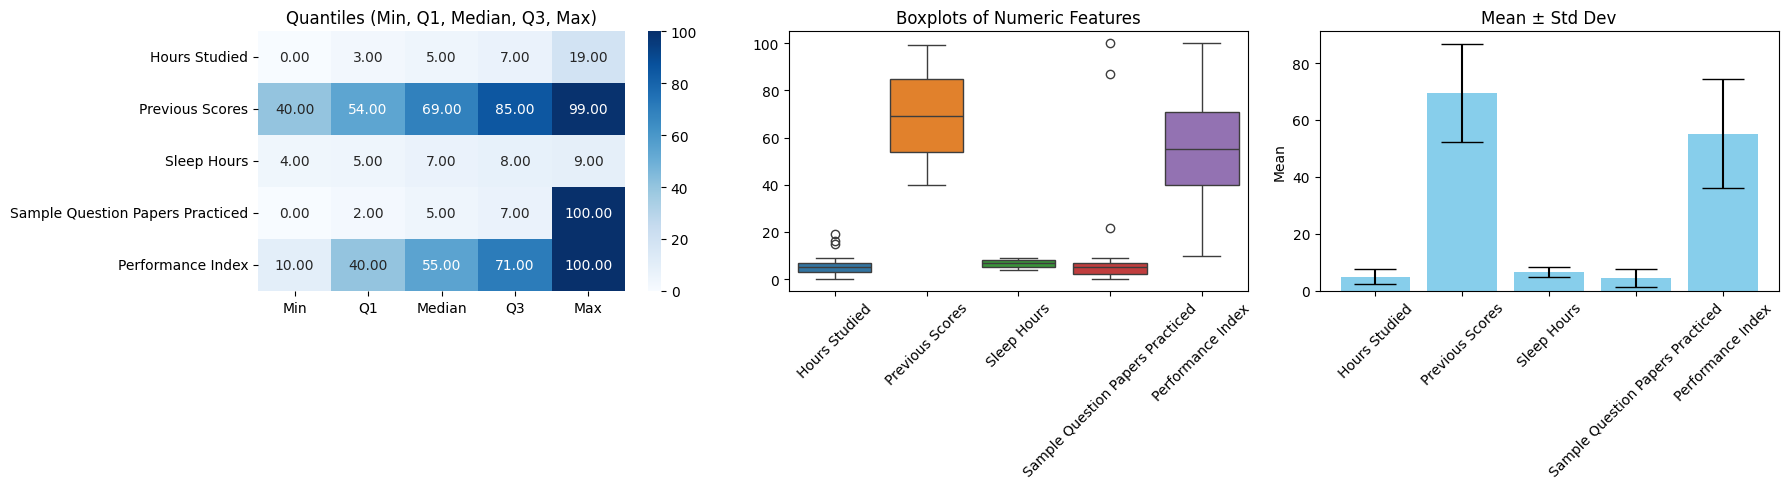

In [23]:
# Create a quantile and frequency table
quantile_table = df[numeric_cols].quantile([0, 0.25, 0.5, 0.75, 1.0]).T
quantile_table.columns = ['Min', 'Q1', 'Median', 'Q3', 'Max']

frequency_table = pd.DataFrame({
    'Column': numeric_cols,
    'Count': [df[col].count() for col in numeric_cols],
    'Mean': [df[col].mean() for col in numeric_cols],
    'Std Dev': [df[col].std() for col in numeric_cols]
})

print("Quantile Table:")
print(quantile_table)
print("\nFrequency Table:")
print(frequency_table)

# Visualize the values: quantiles heatmap, boxplots and mean±std bar chart
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1) Heatmap of quantiles
sns.heatmap(quantile_table, annot=True, fmt=".2f", cmap="Blues", ax=axes[0])
axes[0].set_title("Quantiles (Min, Q1, Median, Q3, Max)")

# 2) Boxplots for numeric features (shows median, IQR, whiskers)
sns.boxplot(data=df[numeric_cols], ax=axes[1])
axes[1].set_title("Boxplots of Numeric Features")
axes[1].tick_params(axis='x', rotation=45)

# 3) Bar plot of means with std dev as error bars
axes[2].bar(frequency_table['Column'], frequency_table['Mean'], yerr=frequency_table['Std Dev'],
            capsize=15, color='skyblue')
axes[2].set_title("Mean ± Std Dev")
axes[2].set_ylabel("Mean")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

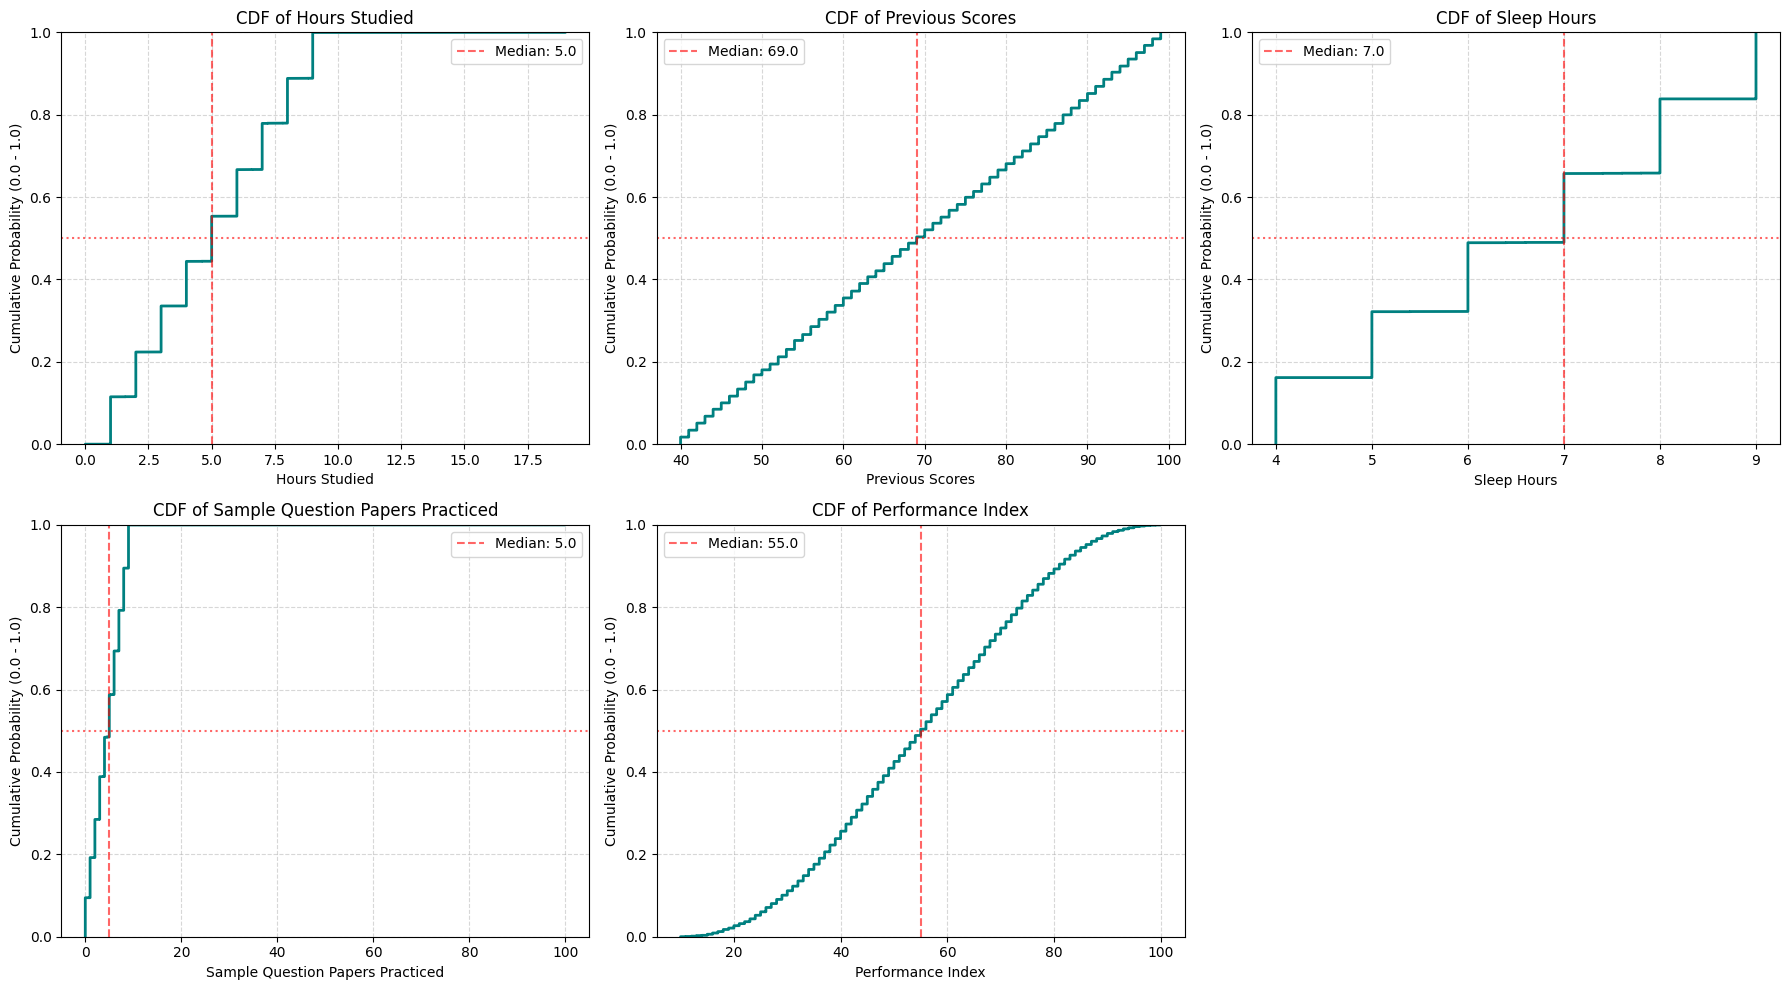

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# 2. Determine layout for subplots
num_plots = len(numeric_cols)
rows = (num_plots // 3) + (1 if num_plots % 3 > 0 else 0)
cols = 3

plt.figure(figsize=(18, 5 * rows))

# 3. Loop through columns and plot Cumulative Distribution Function (CDF)
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    
    # Create the ECDF plot (Empirical Cumulative Distribution Function)
    sns.ecdfplot(data=df, x=col, linewidth=2, color='teal')
    
    # Add a marker for the Median (50th percentile) for context
    median_val = df[col].median()
    plt.axvline(median_val, color='red', linestyle='--', alpha=0.6, label=f'Median: {median_val}')
    plt.axhline(0.5, color='red', linestyle=':', alpha=0.6)
    
    plt.title(f'CDF of {col}')
    plt.xlabel(col)
    plt.ylabel('Cumulative Probability (0.0 - 1.0)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

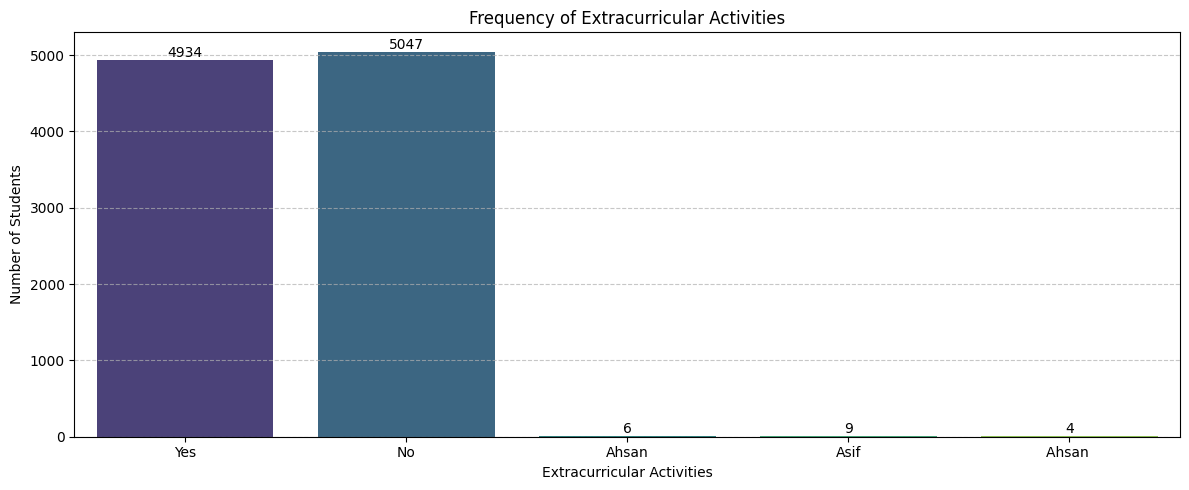

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Check if there are any categorical columns
if len(categorical_cols) > 0:
    # 2. Setup the figure layout
    num_plots = len(categorical_cols)
    rows = (num_plots // 2) + (1 if num_plots % 2 > 0 else 0) 
    cols = 2 if num_plots > 1 else 1
    
    plt.figure(figsize=(12, 5 * rows))
    
    # 3. Loop and Plot
    for i, col in enumerate(categorical_cols):
        plt.subplot(rows, cols, i + 1)
        
        # Create the Count Plot
        # Note: We set hue=col to use colors without warning in newer Seaborn versions
        ax = sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)
        
        # Add exact numbers on top of each bar for clarity
        for container in ax.containers:
            ax.bar_label(container)
        
        plt.title(f'Frequency of {col}')
        plt.xlabel(col)
        plt.ylabel('Number of Students')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found in the dataset.")

In [26]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


--- Frequency Table: Hours vs Performance ---
Performance_Group  Avg (40-60)  Excellent (>80)  Good (60-80)  Low (<40)
Hours_Group                                                             
0-5 Hrs                   1798              151          1651       1935
11-15 Hrs                    0                1             0          0
16+ Hrs                      0                0             2          0
6-10 Hrs                  1518              918          1399        627




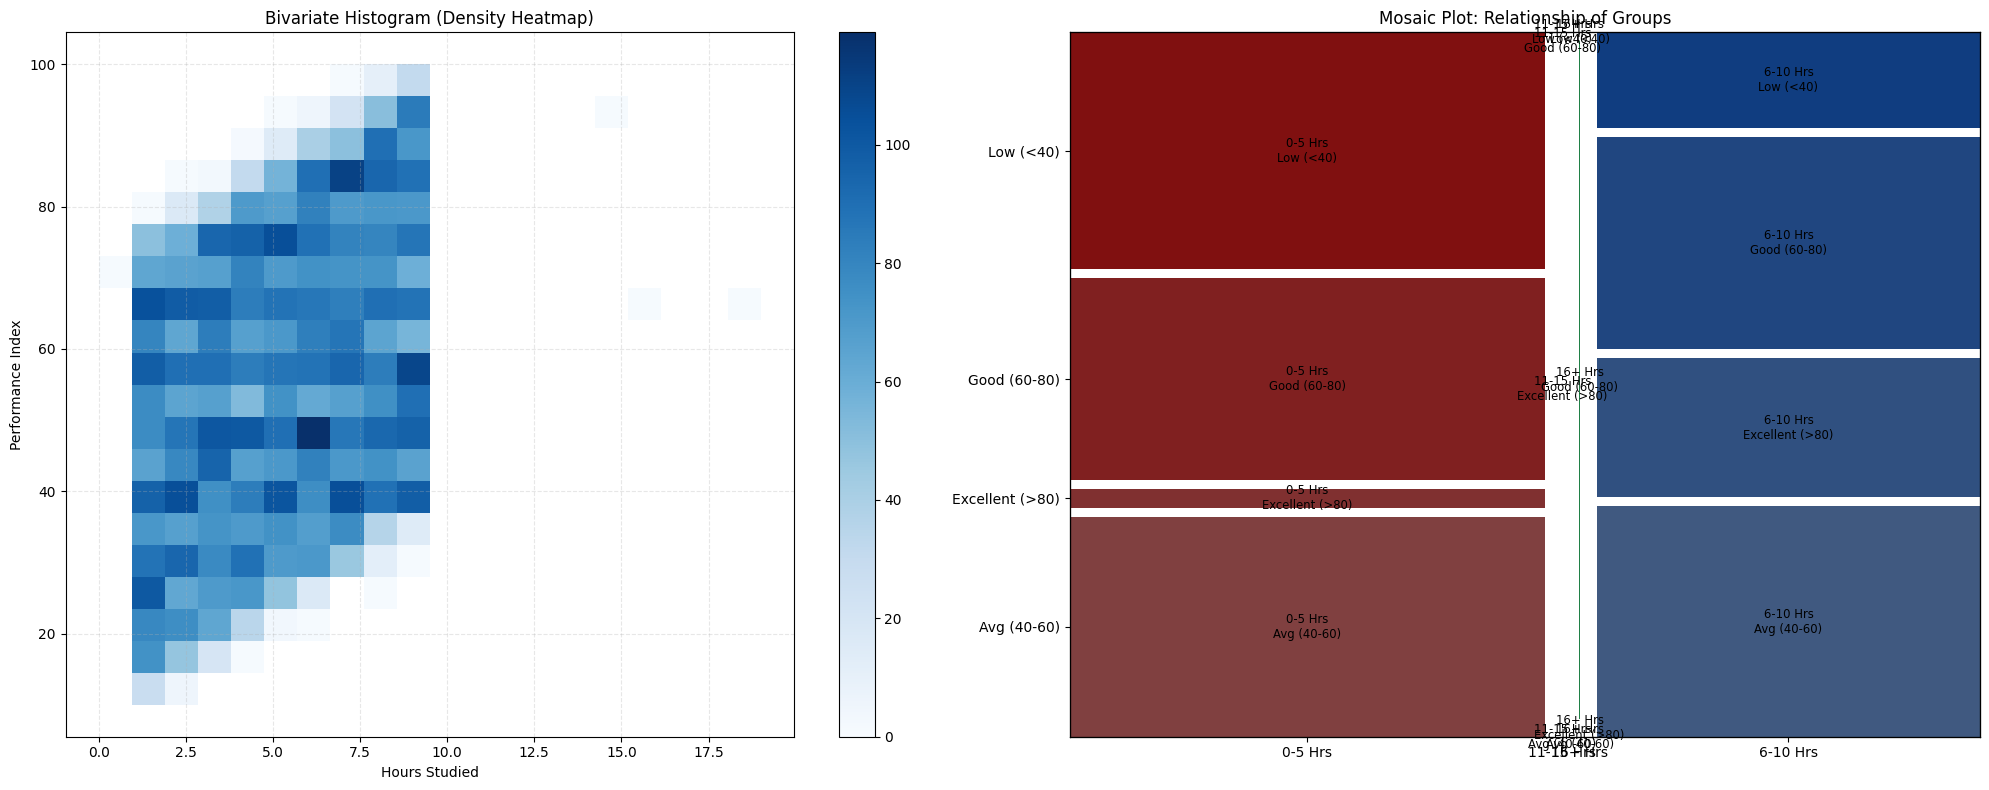

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic

# --- 1. Data Preparation (Binning) ---
# Group 'Hours Studied' (0-19) into 4 buckets
hours_bins = [0, 5, 10, 15, 25]
hours_labels = ['0-5 Hrs', '6-10 Hrs', '11-15 Hrs', '16+ Hrs']
df['Hours_Group'] = pd.cut(df['Hours Studied'], bins=hours_bins, labels=hours_labels, include_lowest=True)

# Group 'Performance Index' (10-100) into 4 buckets
perf_bins = [0, 40, 60, 80, 100]
perf_labels = ['Low (<40)', 'Avg (40-60)', 'Good (60-80)', 'Excellent (>80)']
df['Performance_Group'] = pd.cut(df['Performance Index'], bins=perf_bins, labels=perf_labels, include_lowest=True)

# *** THE FIX: Convert to string to drop empty categories ***
# This ensures the plot only tries to draw groups that actually exist
df['Hours_Group'] = df['Hours_Group'].astype(str)
df['Performance_Group'] = df['Performance_Group'].astype(str)

# --- 2. Frequency Table ---
print("--- Frequency Table: Hours vs Performance ---")
# We use crosstab to see the raw numbers. 
# If you see '0' in this table, that is what caused the error!
freq_table = pd.crosstab(df['Hours_Group'], df['Performance_Group'])
print(freq_table)
print("\n")

# --- 3. Visualizations ---
fig = plt.figure(figsize=(20, 8))

# Plot A: Bivariate Histogram (2D Heatmap)
ax1 = fig.add_subplot(1, 2, 1)
sns.histplot(data=df, x='Hours Studied', y='Performance Index', bins=20, cbar=True, cmap='Blues', ax=ax1)
ax1.set_title('Bivariate Histogram (Density Heatmap)')
ax1.grid(True, linestyle='--', alpha=0.3)

# Plot B: Mosaic Plot
ax2 = fig.add_subplot(1, 2, 2)
# We sort the data first to ensure the plot looks organized
mosaic(df.sort_values(['Hours_Group', 'Performance_Group']), 
       ['Hours_Group', 'Performance_Group'], 
       ax=ax2, 
       title='Mosaic Plot: Relationship of Groups',
       gap=0.02)

plt.tight_layout()
plt.show()

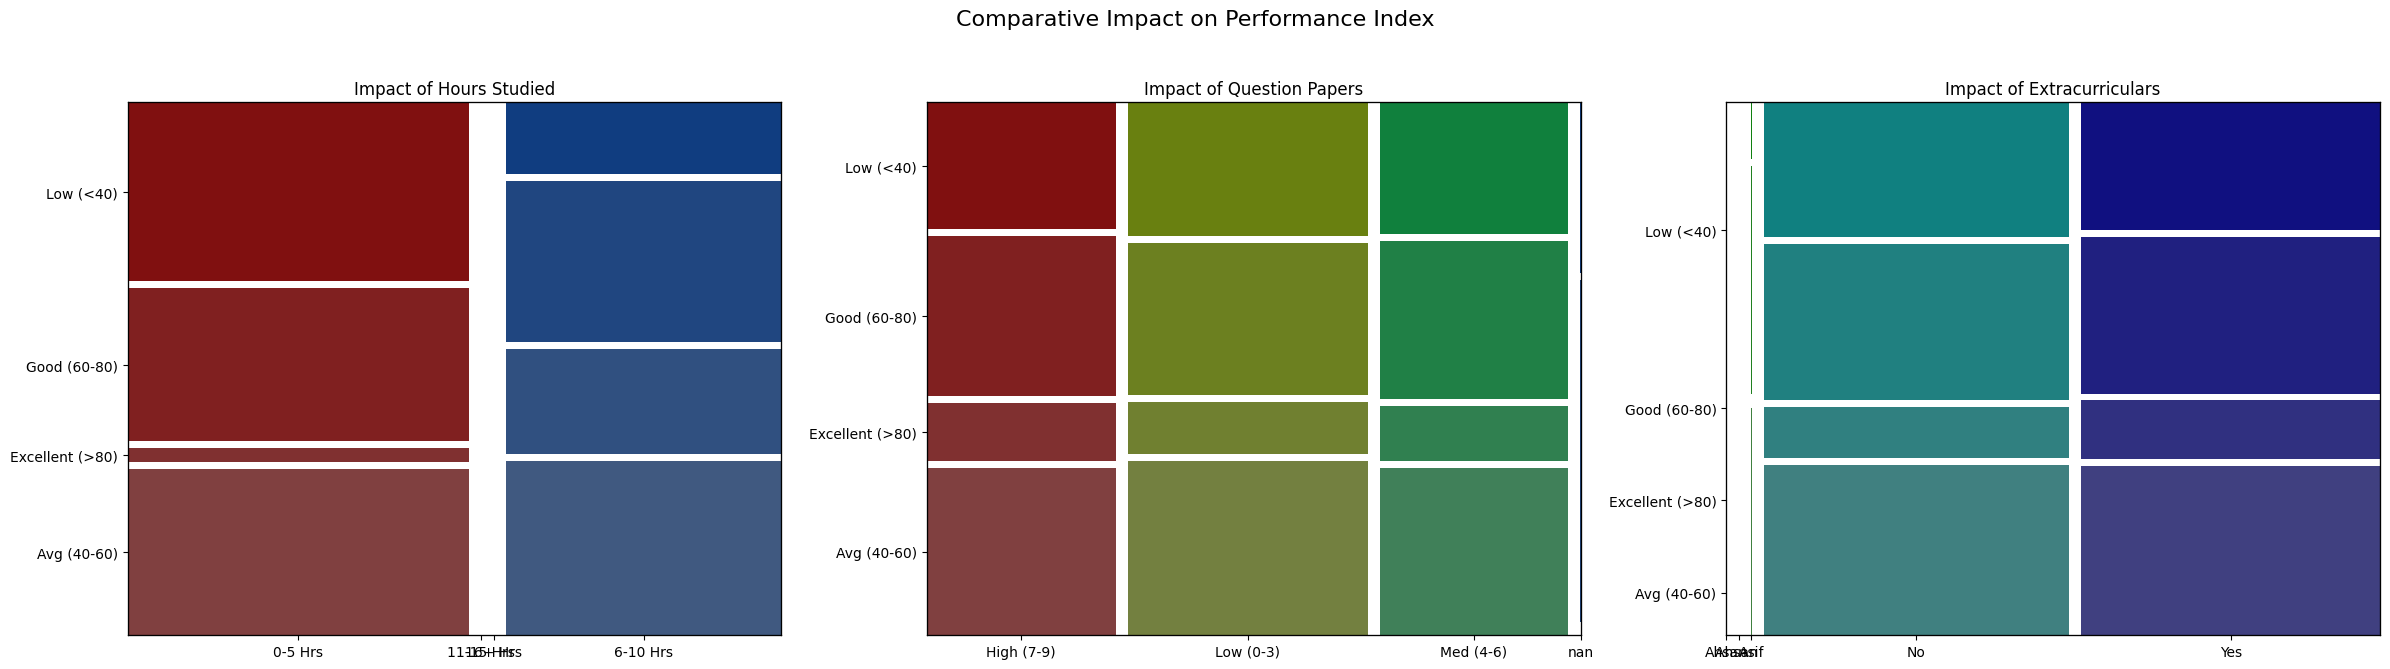

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic

# --- 1. Data Preparation (Binning) ---
# We reuse the bins from before, but add bins for 'Sample Questions'
# Hours Bins
hours_bins = [0, 5, 10, 15, 25]
hours_labels = ['0-5 Hrs', '6-10 Hrs', '11-15 Hrs', '16+ Hrs']
df['Hours_Group'] = pd.cut(df['Hours Studied'], bins=hours_bins, labels=hours_labels, include_lowest=True).astype(str)

# Performance Bins (The Target)
perf_bins = [0, 40, 60, 80, 100]
perf_labels = ['Low (<40)', 'Avg (40-60)', 'Good (60-80)', 'Excellent (>80)']
df['Performance_Group'] = pd.cut(df['Performance Index'], bins=perf_bins, labels=perf_labels, include_lowest=True).astype(str)

# Sample Questions Bins (New!)
# Range is 0-9. Let's group them: Low (0-3), Med (4-6), High (7-9)
question_bins = [0, 3, 6, 10]
question_labels = ['Low (0-3)', 'Med (4-6)', 'High (7-9)']
df['Questions_Group'] = pd.cut(df['Sample Question Papers Practiced'], bins=question_bins, labels=question_labels, include_lowest=True).astype(str)

# Extracurricular is already categorical ('Yes'/'No'), so we just ensure it's a string
df['Extracurricular Activities'] = df['Extracurricular Activities'].astype(str)

# --- 2. Plotting 3 Mosaic Plots ---
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

# Plot 1: Hours Studied vs Performance
# We sort to keep the chart organized
mosaic(df.sort_values(['Hours_Group', 'Performance_Group']), 
       ['Hours_Group', 'Performance_Group'], 
       ax=axes[0], 
       title='Impact of Hours Studied',
       gap=0.02,
       labelizer=lambda k: '') # Hiding labels inside boxes to reduce clutter

# Plot 2: Sample Questions vs Performance
mosaic(df.sort_values(['Questions_Group', 'Performance_Group']), 
       ['Questions_Group', 'Performance_Group'], 
       ax=axes[1], 
       title='Impact of Question Papers',
       gap=0.02,
       labelizer=lambda k: '')

# Plot 3: Extracurricular vs Performance
mosaic(df.sort_values(['Extracurricular Activities', 'Performance_Group']), 
       ['Extracurricular Activities', 'Performance_Group'], 
       ax=axes[2], 
       title='Impact of Extracurriculars',
       gap=0.02,
       labelizer=lambda k: '')

# Add a global legend/explanation
plt.suptitle("Comparative Impact on Performance Index", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Make room for title
plt.show()

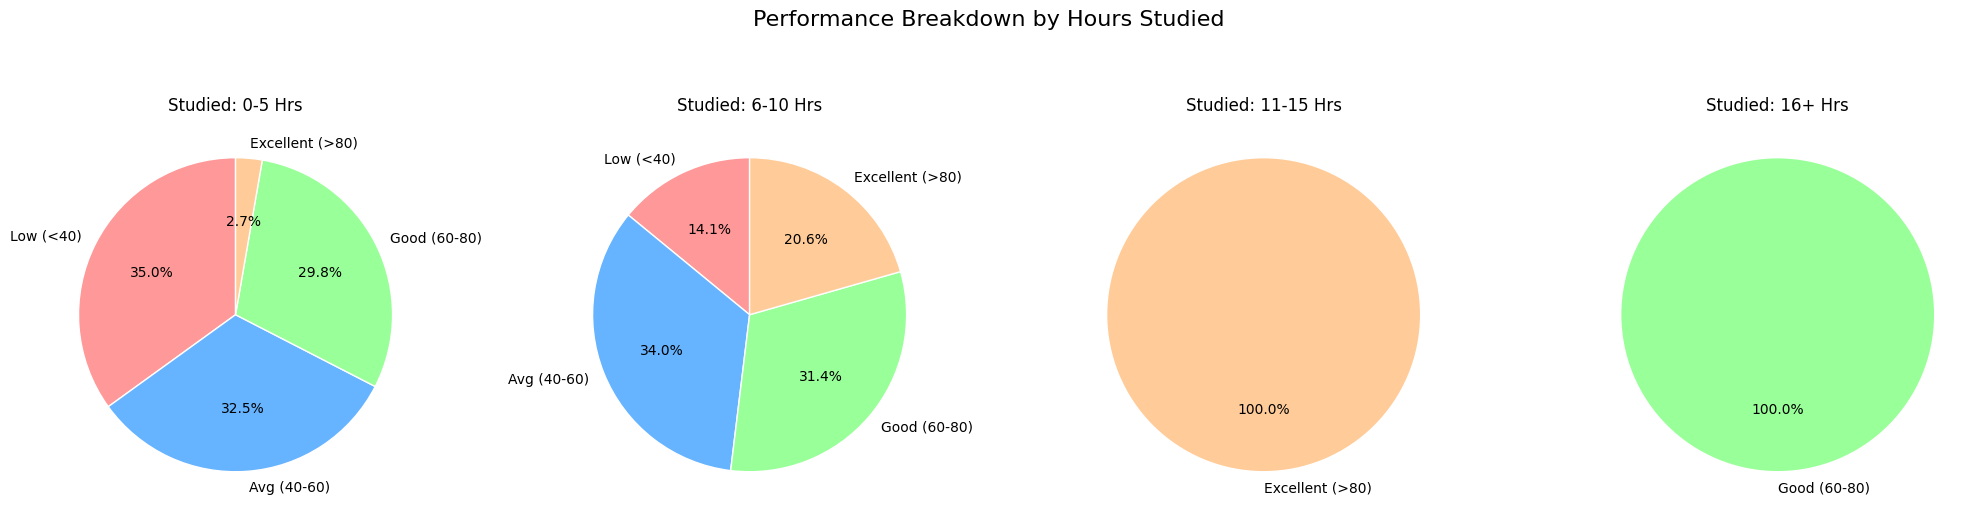

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Data Preparation ---
hours_bins = [0, 5, 10, 15, 25]
hours_labels = ['0-5 Hrs', '6-10 Hrs', '11-15 Hrs', '16+ Hrs']
df['Hours_Group'] = pd.cut(df['Hours Studied'], bins=hours_bins, labels=hours_labels, include_lowest=True)

perf_bins = [0, 40, 60, 80, 100]
perf_labels = ['Low (<40)', 'Avg (40-60)', 'Good (60-80)', 'Excellent (>80)']
df['Performance_Group'] = pd.cut(df['Performance Index'], bins=perf_bins, labels=perf_labels, include_lowest=True)

# --- 2. Calculate Counts ---
# dropna=False ensures we don't lose categories that have 0 students
pie_data = pd.crosstab(df['Hours_Group'], df['Performance_Group'], dropna=False)

# FIX 1: Reindex ensures all rows exist, even if count is 0 (Prevents KeyError)
pie_data = pie_data.reindex(hours_labels, fill_value=0)

# --- 3. Plotting ---
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
fig.suptitle('Performance Breakdown by Hours Studied', fontsize=16)

colors = {'Low (<40)': '#ff9999', 'Avg (40-60)': '#66b3ff', 'Good (60-80)': '#99ff99', 'Excellent (>80)': '#ffcc99'}

for i, hour_group in enumerate(hours_labels):
    ax = axes[i]
    
    # Get data for this specific hour group
    data = pie_data.loc[hour_group]
    
    # Filter out zeros for the plot
    data_to_plot = data[data > 0]
    
    # FIX 2: Check if there is actually data to plot (Prevents ValueError)
    if data_to_plot.sum() == 0:
        ax.text(0.5, 0.5, "No Students\nin this Group", ha='center', va='center')
        ax.axis('off') # Hide the empty circle
    else:
        # Map colors safely
        group_colors = [colors[label] for label in data_to_plot.index]
        
        ax.pie(data_to_plot, labels=data_to_plot.index, autopct='%1.1f%%', startangle=90, 
               colors=group_colors, wedgeprops={'edgecolor': 'white'})
    
    ax.set_title(f'Studied: {hour_group}')

plt.tight_layout()
plt.show()

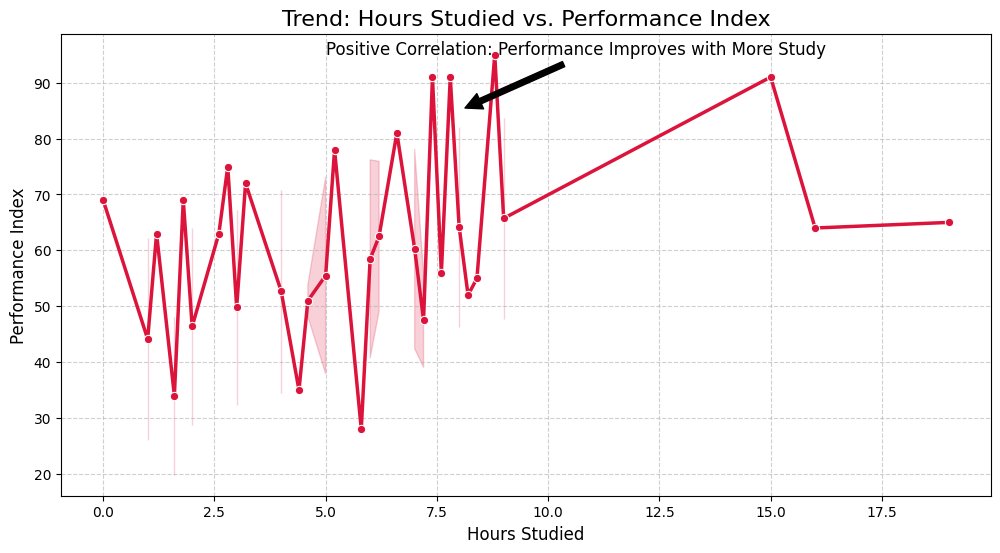

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Create the Line Plot
# sns.lineplot automatically calculates the Mean for each X value
# The shaded region represents the 95% Confidence Interval (uncertainty)
sns.lineplot(data=df, x='Hours Studied', y='Performance Index', 
             marker='o', linewidth=2.5, color='crimson', errorbar='sd')

plt.title('Trend: Hours Studied vs. Performance Index', fontsize=16)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Performance Index', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Add a text annotation to highlight the trend
plt.annotate('Positive Correlation: Performance Improves with More Study', xy=(8, 85), xytext=(5, 95),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

plt.show()

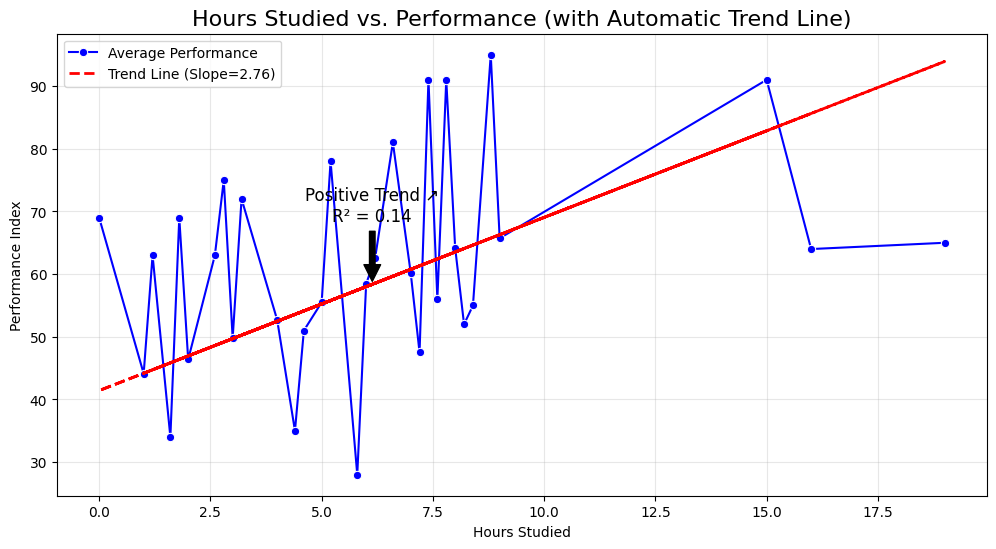

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

plt.figure(figsize=(12, 6))

# 1. Draw the Data Line (Mean values)
sns.lineplot(data=df, x='Hours Studied', y='Performance Index', 
             marker='o', label='Average Performance', color='blue', errorbar=None)

# 2. Calculate the Trend Line (Linear Regression)
# This math finds the "Best Fit" line for the entire dataset
slope, intercept, r_value, p_value, std_err = linregress(df['Hours Studied'], df['Performance Index'])

# Create the trend line data
x_vals = df['Hours Studied'].unique()
y_vals = intercept + slope * x_vals

# 3. Plot the Trend Line
plt.plot(x_vals, y_vals, color='red', linestyle='--', linewidth=2, label=f'Trend Line (Slope={slope:.2f})')

# 4. Add Annotation automatically based on the Slope
# If slope is positive (>0), it's an upward trend.
trend_text = "Positive Trend ↗" if slope > 0 else "Negative Trend ↘"
mid_x = x_vals.mean()
mid_y = intercept + slope * mid_x

plt.annotate(f'{trend_text}\nR² = {r_value**2:.2f}', 
             xy=(mid_x, mid_y), xytext=(mid_x, mid_y + 10),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, ha='center')

plt.title('Hours Studied vs. Performance (with Automatic Trend Line)', fontsize=16)
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

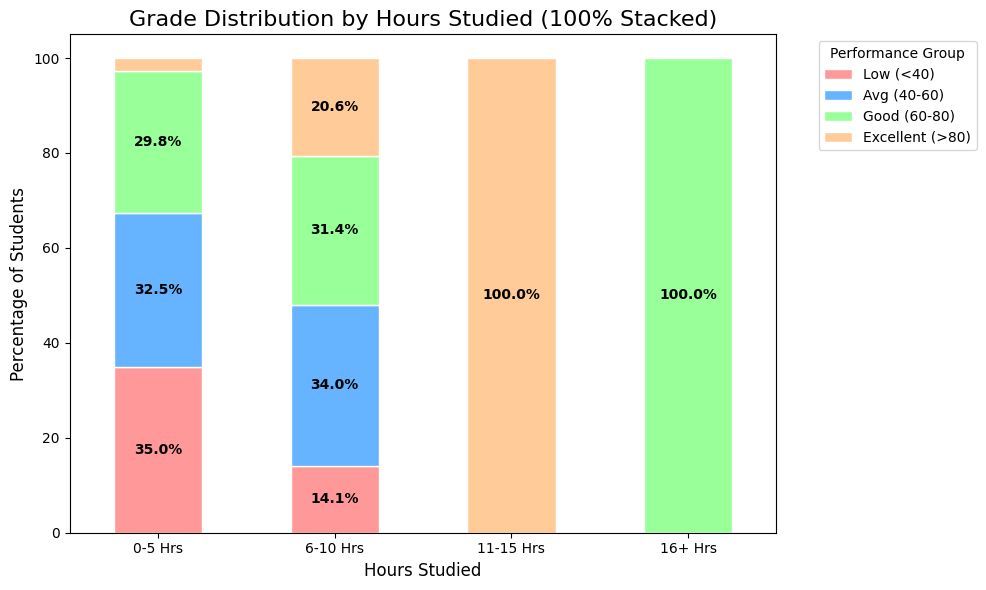

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Data Preparation ---
hours_bins = [0, 5, 10, 15, 25]
hours_labels = ['0-5 Hrs', '6-10 Hrs', '11-15 Hrs', '16+ Hrs']
df['Hours_Group'] = pd.cut(df['Hours Studied'], bins=hours_bins, labels=hours_labels, include_lowest=True)

perf_bins = [0, 40, 60, 80, 100]
perf_labels = ['Low (<40)', 'Avg (40-60)', 'Good (60-80)', 'Excellent (>80)']
df['Performance_Group'] = pd.cut(df['Performance Index'], bins=perf_bins, labels=perf_labels, include_lowest=True)

# --- 2. Calculate Proportions (Percentages) ---
# Crosstab gives raw counts
cross_tab = pd.crosstab(df['Hours_Group'], df['Performance_Group'])

# Divide by the row sum to get percentages (so each bar adds up to 100%)
cross_tab_prop = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# --- 3. Plotting ---
# We define specific colors for the grades
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'] # Red, Blue, Green, Orange

ax = cross_tab_prop.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors, edgecolor='white')

# Add labels inside the bars
for c in ax.containers:
    # Only label segments that are big enough to read (> 5%)
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10, color='black', weight='bold')

plt.title('Grade Distribution by Hours Studied (100% Stacked)', fontsize=16)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Percentage of Students', fontsize=12)
plt.legend(title='Performance Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

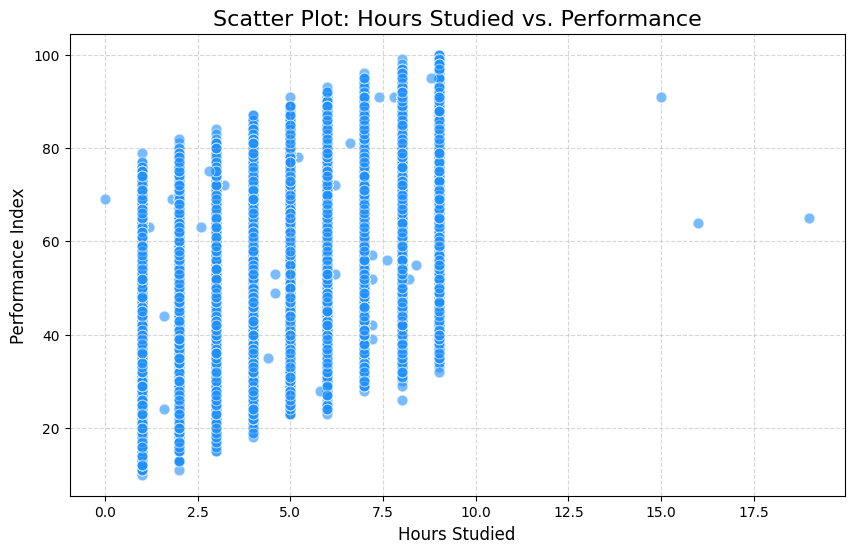

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Create Scatter Plot
# alpha=0.5 makes the dots semi-transparent so you can see where they overlap
sns.scatterplot(data=df, x='Hours Studied', y='Performance Index', 
                alpha=0.6, color='dodgerblue', edgecolor='w', s=60)

plt.title('Scatter Plot: Hours Studied vs. Performance', fontsize=16)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Performance Index', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

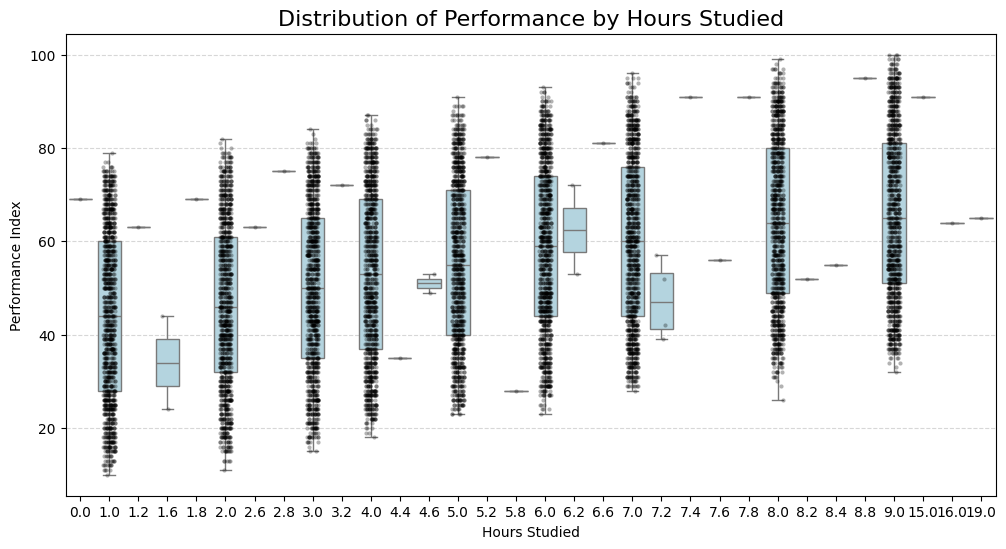

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# 1. The Box Plot (The Summary)
# Shows the Median, IQR (25th-75th percentile), and Whiskers
sns.boxplot(data=df, x='Hours Studied', y='Performance Index', 
            color='lightblue', showfliers=False) # Hide outliers since strip plot will show them

# 2. The Strip Plot (The Raw Data)
# jitter=True spreads the dots out horizontally so they don't overlap perfectly
sns.stripplot(data=df, x='Hours Studied', y='Performance Index', 
              color='black', alpha=0.3, jitter=0.2, size=3)

plt.title('Distribution of Performance by Hours Studied', fontsize=16)
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

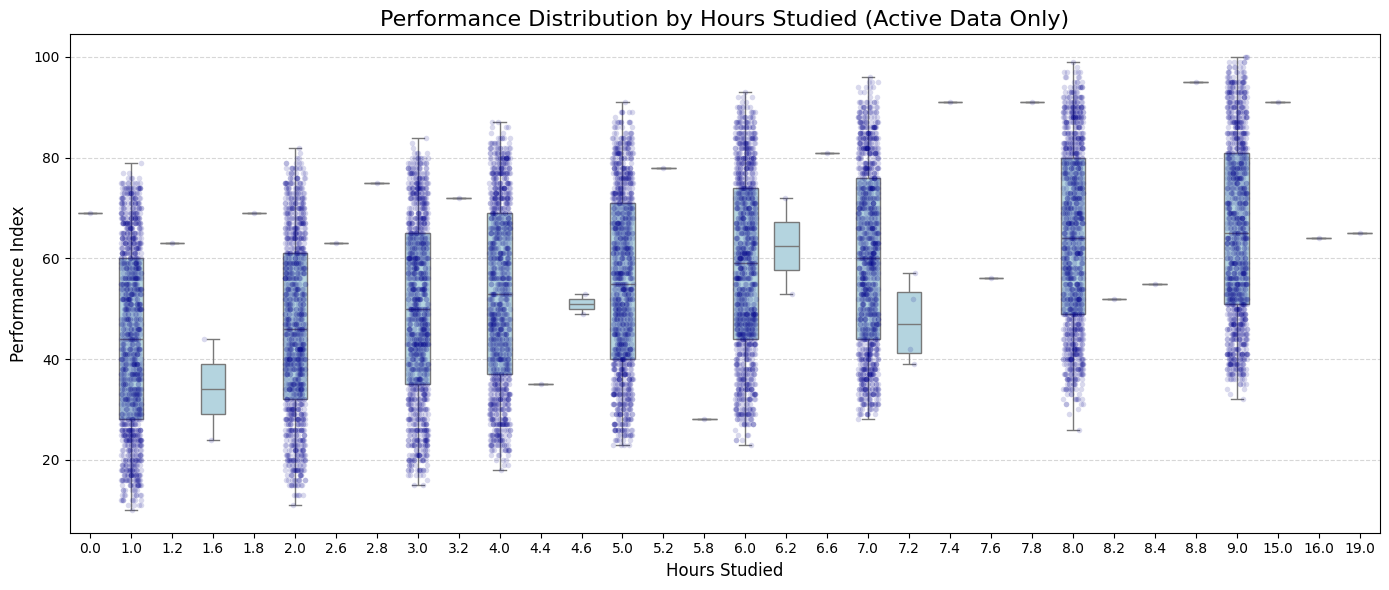

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# 1. Filter Data: Only keep hours that actually have students
# This removes any theoretical hours (like 13.5) that might be causing gaps
# We sort the values so the x-axis is in order (1, 2, 3...)
valid_hours = sorted(df['Hours Studied'].unique())
filtered_df = df[df['Hours Studied'].isin(valid_hours)]

# 2. The Box Plot
sns.boxplot(data=filtered_df, x='Hours Studied', y='Performance Index', 
            order=valid_hours, # Force the order
            color='lightblue', showfliers=False, width=0.6)

# 3. The Strip Plot
sns.stripplot(data=filtered_df, x='Hours Studied', y='Performance Index', 
              order=valid_hours, # Must match the boxplot order
              color='darkblue', alpha=0.15, jitter=0.25, size=4)

plt.title('Performance Distribution by Hours Studied (Active Data Only)', fontsize=16)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Performance Index', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Clean up the x-axis labels
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [36]:
sns.boxplot(data=df[numeric_cols], ax=axes[1])
axes[1].set_title("Boxplots of Numeric Features")
axes[1].tick_params(axis='x', rotation=45)

d:\GitHub\New folder\Machine_Learning_Project\.venv\Lib\site-packages\seaborn\categorical.py:379: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(-.5, n - .5, auto=None)


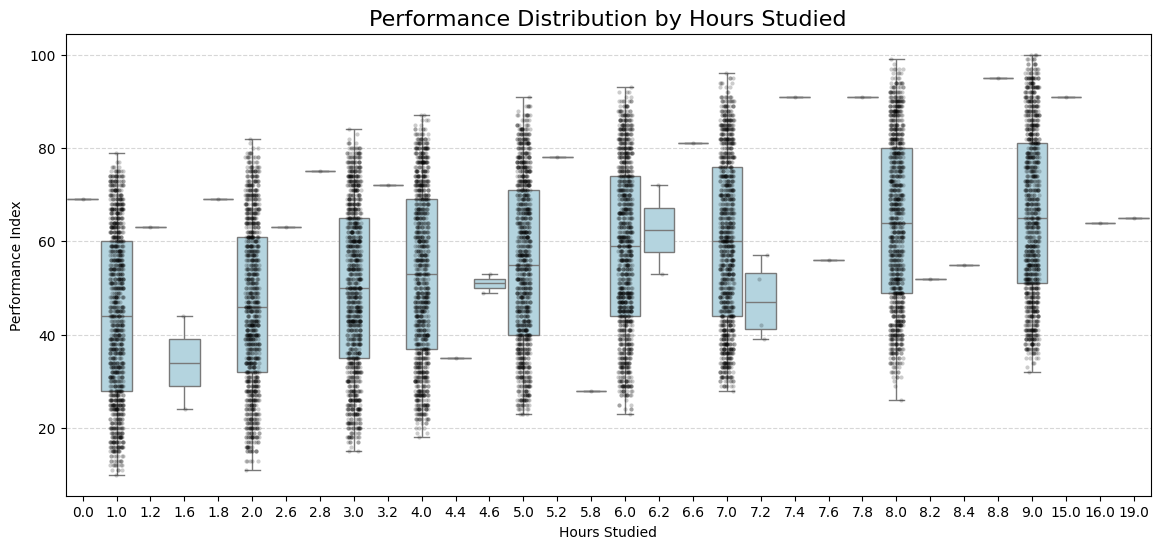

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# 1. The Box Plot
# By default, if x is numeric, Seaborn treats it as continuous.
# We pass it as-is, but if you see gaps, we can force it to be categorical.
sns.boxplot(data=df, x='Hours Studied', y='Performance Index', 
            color='lightblue', showfliers=True, width=0.9)

# 2. The Strip Plot
sns.stripplot(data=df, x='Hours Studied', y='Performance Index', 
              color='black', alpha=0.2, jitter=0.2, size=3)

plt.title('Performance Distribution by Hours Studied', fontsize=16)
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

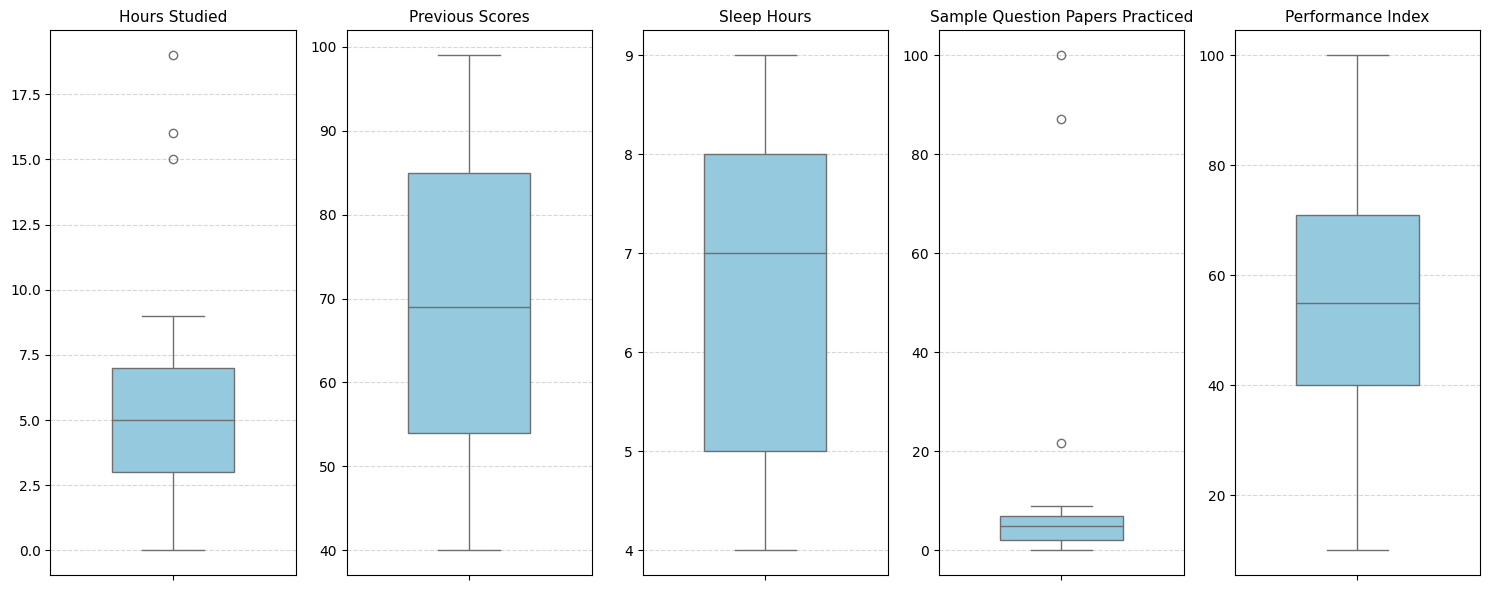

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select Numeric Columns
numeric_cols = df.select_dtypes(include=['number']).columns

# 2. Setup the Figure
# We make it wide to fit all columns side-by-side
plt.figure(figsize=(15, 6))

# 3. Loop and Plot
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1) # 1 Row, N Columns
    
    # Vertical Box Plot (orient='v' is default)
    sns.boxplot(y=df[col], color='skyblue', width=0.5)
    
    plt.title(col, fontsize=11)
    plt.ylabel('') # Remove y-label to save space
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

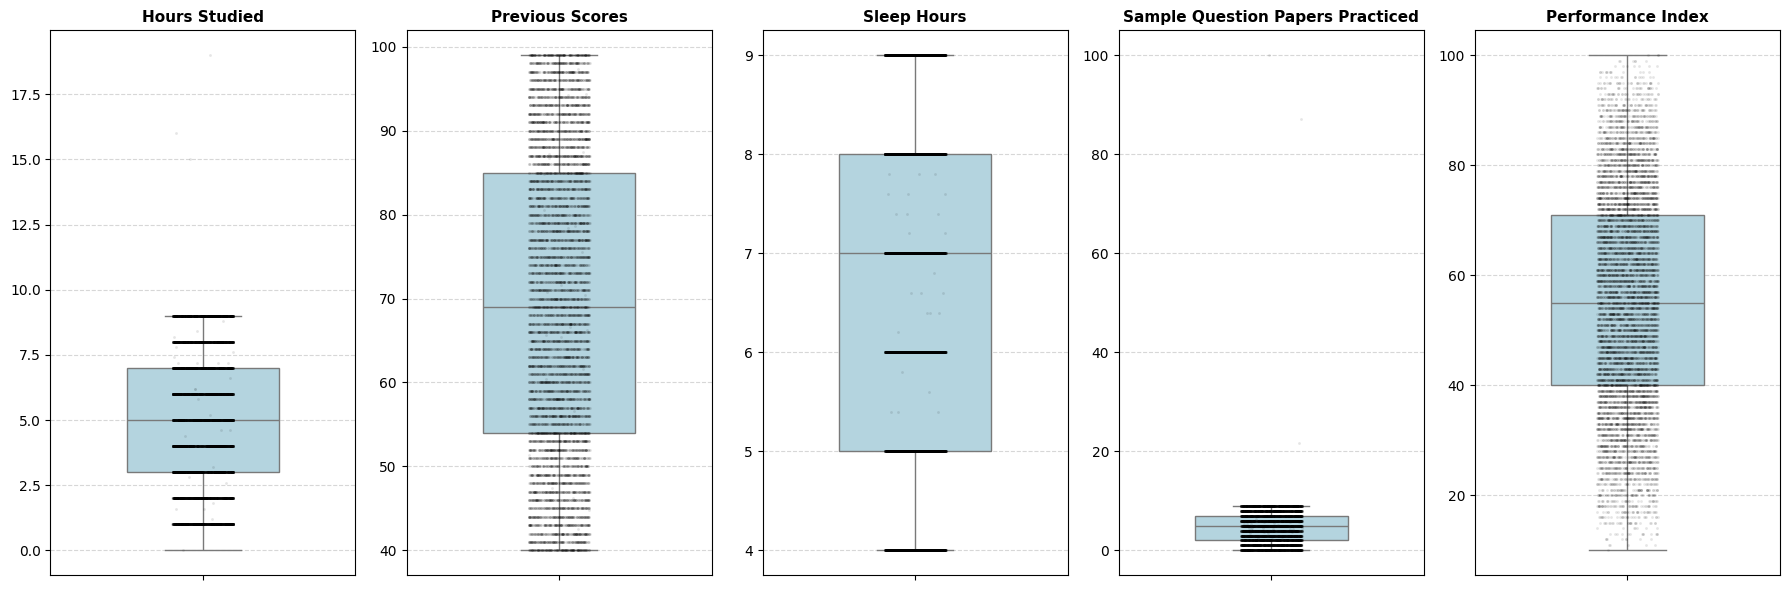

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select Numeric Columns
numeric_cols = df.select_dtypes(include=['number']).columns

# 2. Setup the Figure
plt.figure(figsize=(18, 6))

# 3. Loop and Plot
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    
    # Layer 1: The Box Plot (Summary)
    sns.boxplot(y=df[col], color='lightblue', showfliers=False, width=0.5)
    
    # Layer 2: The Strip Plot (Raw Data Dots)
    sns.stripplot(y=df[col], color='black', alpha=0.1, jitter=True, size=2)
    
    plt.title(col, fontsize=11, fontweight='bold')
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

C:\Users\Ah San\AppData\Local\Temp\ipykernel_23804\26454404.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Extracurricular Activities', y='Performance Index',


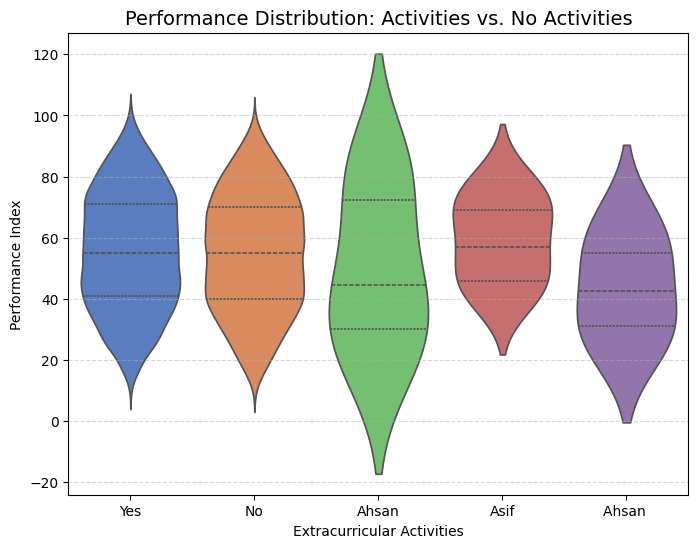

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Vertical Violin Plot
# x = Categorical Variable (Groups)
# y = Numerical Variable (Values)
sns.violinplot(data=df, x='Extracurricular Activities', y='Performance Index', 
               palette='muted', inner='quartile') 

plt.title('Performance Distribution: Activities vs. No Activities', fontsize=14)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Performance Index')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

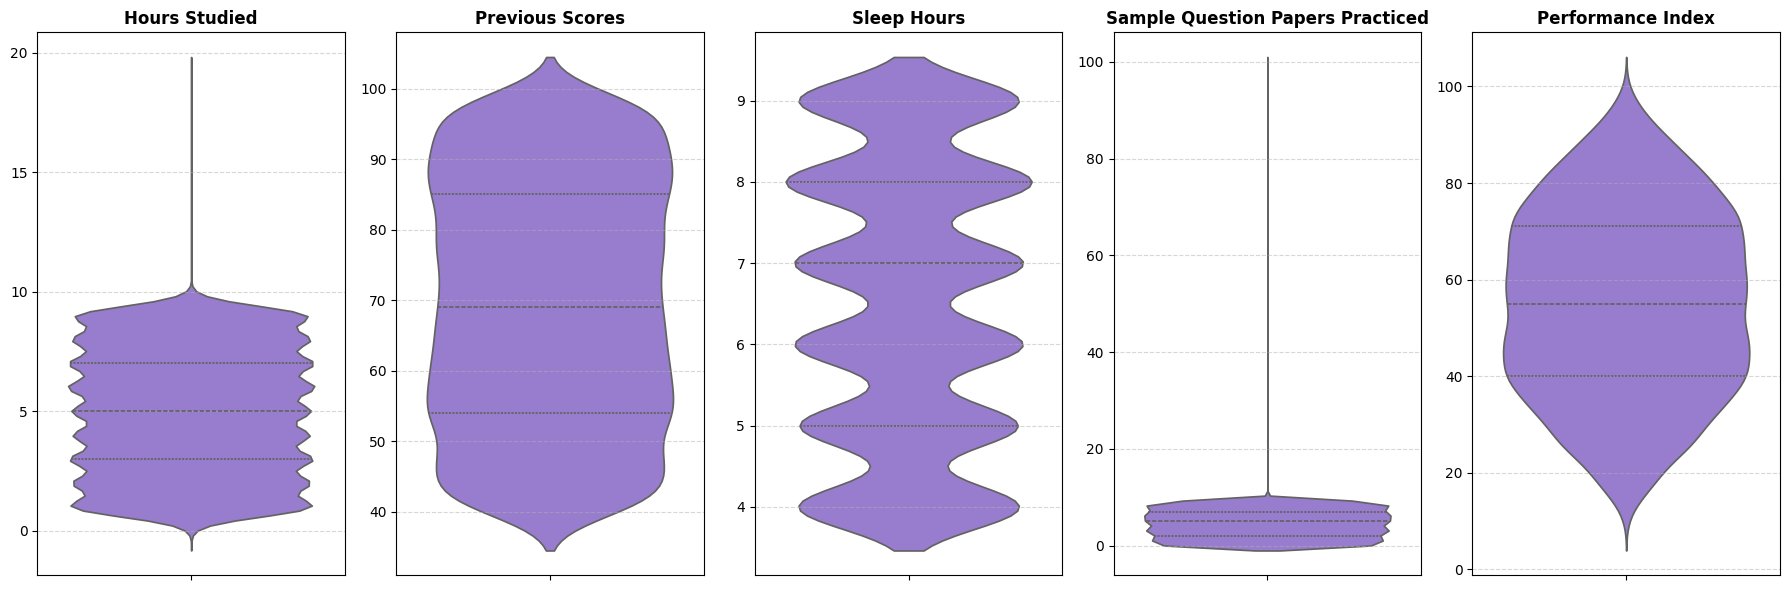

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select Numeric Columns
numeric_cols = df.select_dtypes(include=['number']).columns

# 2. Setup the Figure
# We create a grid of subplots (1 row, N columns)
plt.figure(figsize=(18, 6))

# 3. Loop through each column and create a violin plot
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    
    # Create Violin Plot
    # We use a generic 'x' value so the violin is centered
    sns.violinplot(y=df[col], color='mediumpurple', inner='quartile')
    
    plt.title(col, fontsize=12, fontweight='bold')
    plt.ylabel('') # Remove Y-label to reduce clutter
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

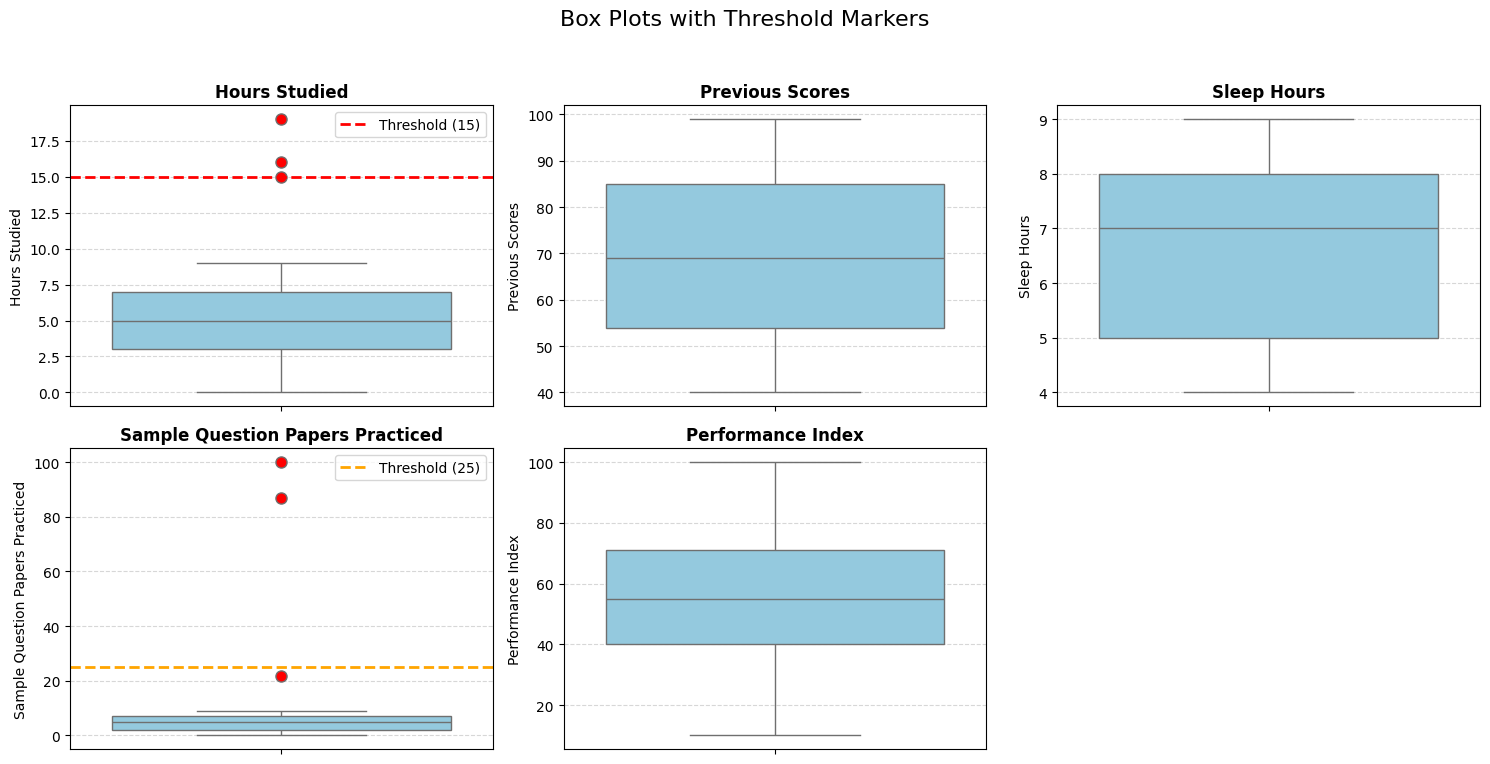

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# We do NOT delete any rows here. We use the full 'df'.

numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 8))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    
    # Draw the standard box plot with all data
    sns.boxplot(y=df[col], color='skyblue', 
                flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
    
    # --- Threshold 1: Hours Studied ---
    if col == 'Hours Studied':
        plt.axhline(y=15, color='red', linestyle='--', linewidth=2, label='Threshold (15)')
        plt.legend()
        
    # --- Threshold 2: Sample Question Papers ---
    elif col == 'Sample Question Papers Practiced':
        plt.axhline(y=25, color='orange', linestyle='--', linewidth=2, label='Threshold (25)')
        plt.legend()
    
    plt.title(f'{col}', fontsize=12, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle('Box Plots with Threshold Markers', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [48]:
df.shape

(10000, 9)

In [49]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Hours_Group,Performance_Group,Questions_Group
0,7.4,99.0,Yes,9.0,1.0,91.0,6-10 Hrs,Excellent (>80),Low (0-3)
1,19.0,82.0,No,4.0,21.6,65.0,16+ Hrs,Good (60-80),nan
2,8.0,51.0,No,7.0,2.0,45.0,6-10 Hrs,Avg (40-60),Low (0-3)
3,5.0,52.0,Yes,5.0,100.0,36.0,0-5 Hrs,Low (<40),nan
4,7.0,75.0,No,6.2,5.0,66.0,6-10 Hrs,Good (60-80),Med (4-6)


Removed 3 rows based on manual thresholds.
Removed 1 statistical outliers from other columns.
Final Dataset Size: 9996


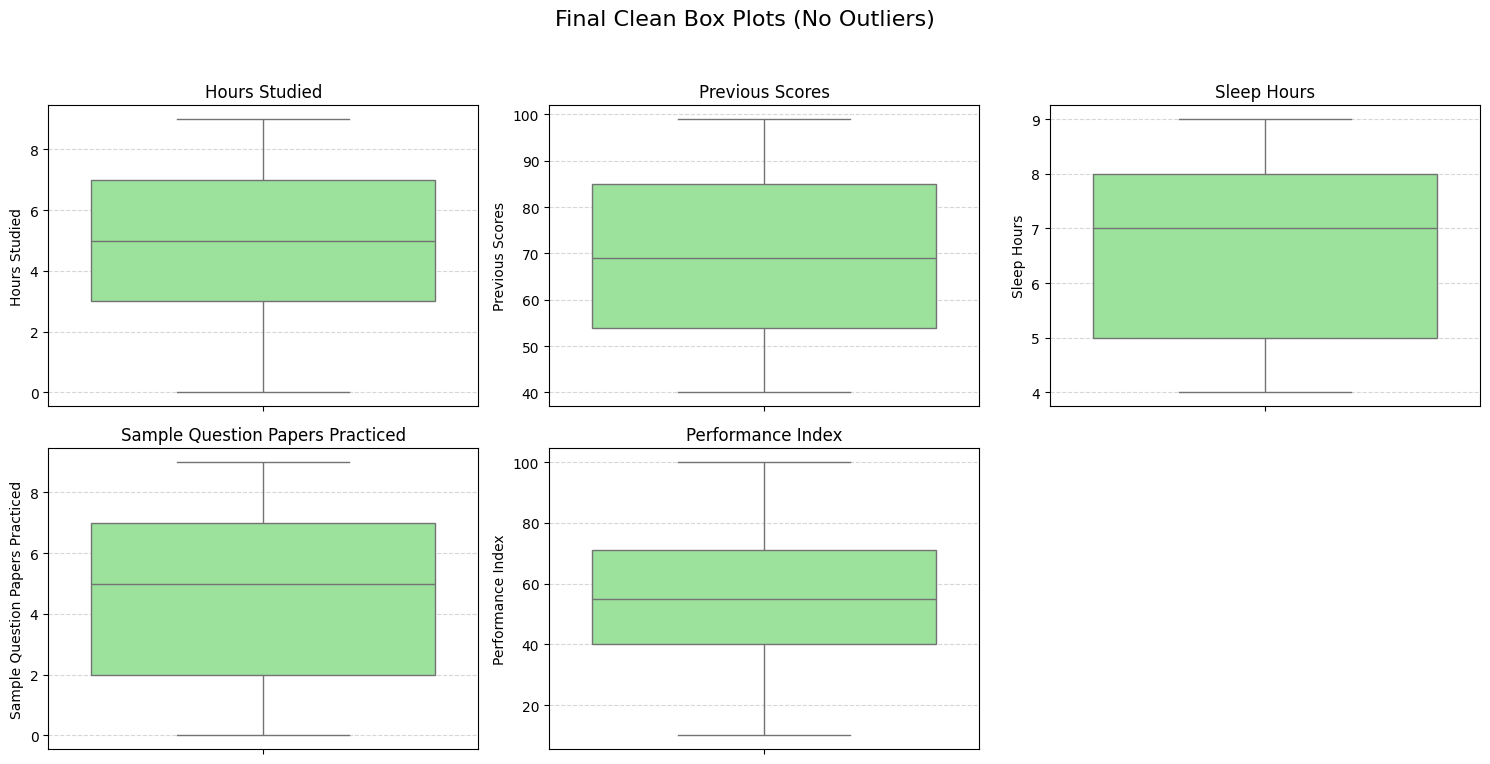

In [50]:
# --- Step 1: Remove Manual Outliers ---
initial_count = len(df)

# Condition 1: Hours Studied <= 15
# Condition 2: Sample Question Papers Practiced <= 25
df = df[(df['Hours Studied'] <= 15) & (df['Sample Question Papers Practiced'] <= 25)]

print(f"Removed {initial_count - len(df)} rows based on manual thresholds.")

# --- Step 2: Remove Statistical Outliers (IQR Method) from ALL columns ---
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter: Keep rows where ALL columns are within bounds
condition = ~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)

step2_start = len(df)
df = df[condition]
print(f"Removed {step2_start - len(df)} statistical outliers from other columns.")
print(f"Final Dataset Size: {len(df)}")

# --- Step 3: Visualize Clean Box Plots ---
plt.figure(figsize=(15, 8))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col], color='lightgreen', flierprops=dict(marker='o', markerfacecolor='red'))
    plt.title(f'{col}')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle('Final Clean Box Plots (No Outliers)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [58]:
df.sample(5, random_state=42)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Hours_Group,Performance_Group,Questions_Group
1081,6.0,85.0,No,8.0,4.0,74.0,6-10 Hrs,Good (60-80),Med (4-6)
4339,3.0,86.0,Yes,7.0,8.0,71.0,0-5 Hrs,Good (60-80),High (7-9)
8969,7.0,72.0,No,7.0,2.0,62.0,6-10 Hrs,Good (60-80),Low (0-3)
5459,4.0,65.0,No,4.0,0.0,45.0,0-5 Hrs,Avg (40-60),Low (0-3)
2410,5.0,80.0,Yes,5.0,6.0,66.0,0-5 Hrs,Good (60-80),Med (4-6)


In [54]:
df.shape

(9996, 9)

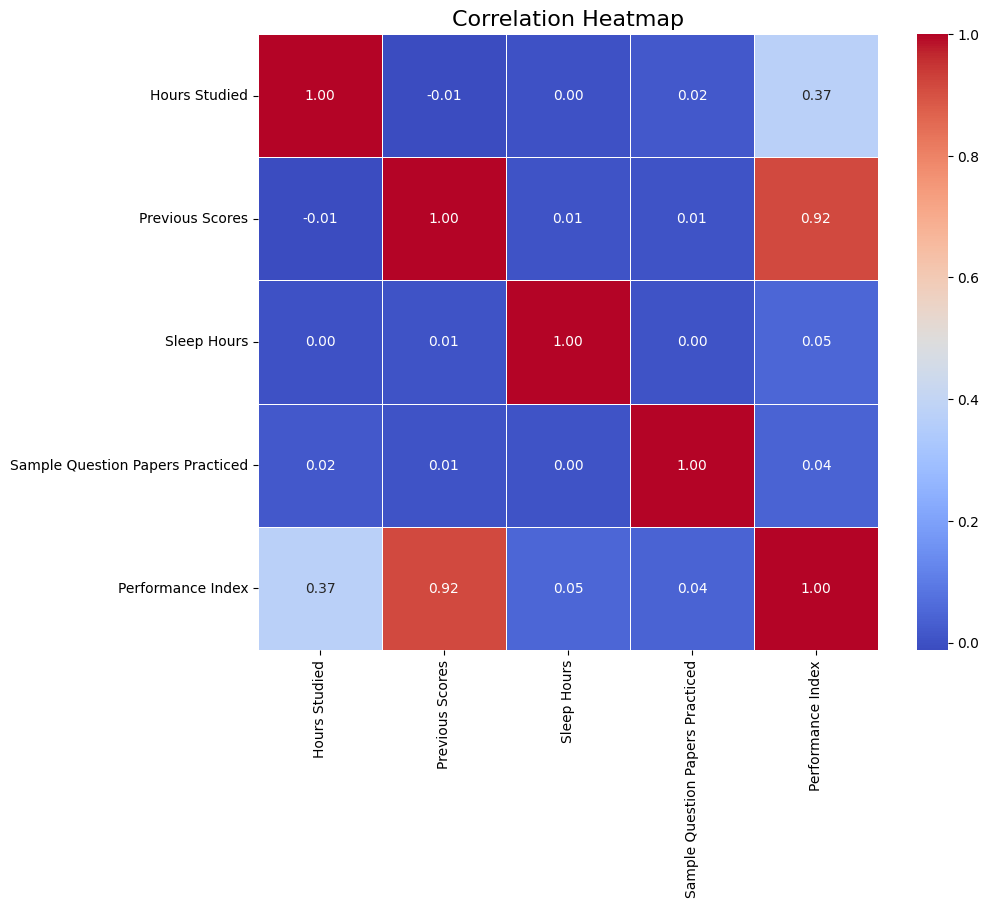

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select Numeric Columns (Correlation only works on numbers)
numeric_df = df.select_dtypes(include=['number'])

# 2. Calculate Correlation Matrix
corr_matrix = numeric_df.corr()

# 3. Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [63]:
print(numeric_df.corr())

                                  Hours Studied  Previous Scores  Sleep Hours  \
Hours Studied                          1.000000        -0.012340     0.000907   
Previous Scores                       -0.012340         1.000000     0.005952   
Sleep Hours                            0.000907         0.005952     1.000000   
Sample Question Papers Practiced       0.017711         0.006959     0.004340   
Performance Index                      0.373555         0.915256     0.048113   

                                  Sample Question Papers Practiced  \
Hours Studied                                             0.017711   
Previous Scores                                           0.006959   
Sleep Hours                                               0.004340   
Sample Question Papers Practiced                          1.000000   
Performance Index                                         0.042727   

                                  Performance Index  
Hours Studied                         

In [71]:
# Calculate correlation for the entire DataFrame
# numeric_only=True ensures it ignores text columns automatically
corr_mtx = df.corr(numeric_only=True)

# Display the matrix
print(corr_mtx)

                                  Hours Studied  Previous Scores  Sleep Hours  \
Hours Studied                          1.000000        -0.012340     0.000907   
Previous Scores                       -0.012340         1.000000     0.005952   
Sleep Hours                            0.000907         0.005952     1.000000   
Sample Question Papers Practiced       0.017711         0.006959     0.004340   
Performance Index                      0.373555         0.915256     0.048113   

                                  Sample Question Papers Practiced  \
Hours Studied                                             0.017711   
Previous Scores                                           0.006959   
Sleep Hours                                               0.004340   
Sample Question Papers Practiced                          1.000000   
Performance Index                                         0.042727   

                                  Performance Index  
Hours Studied                         

In [72]:
# Show how 'Hours Studied' correlates with other columns
hours_corr = df.corr(numeric_only=True)['Hours Studied'].sort_values(ascending=False)
print(hours_corr)

Hours Studied                       1.000000
Performance Index                   0.373555
Sample Question Papers Practiced    0.017711
Sleep Hours                         0.000907
Previous Scores                    -0.012340
Name: Hours Studied, dtype: float64


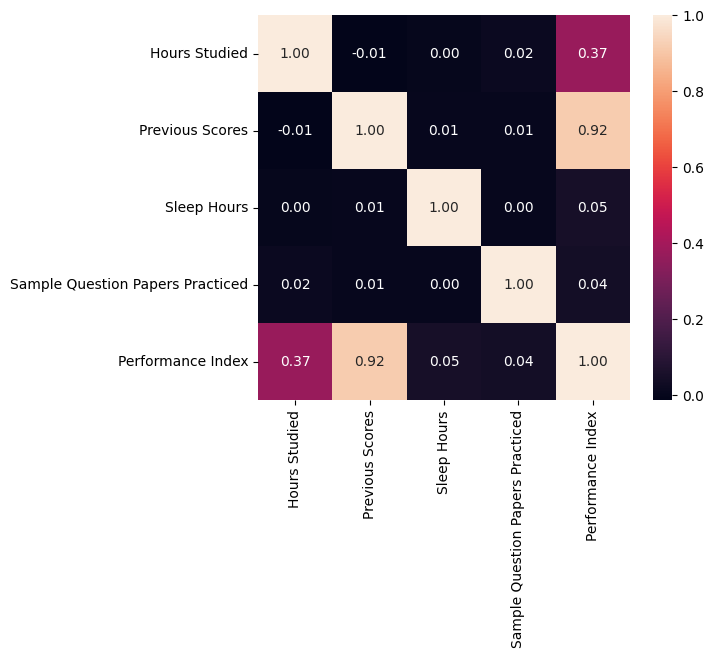

In [73]:
plt.figure(figsize=(6,5))
plot = sns.heatmap(corr_mtx, annot=True, fmt=".2f")

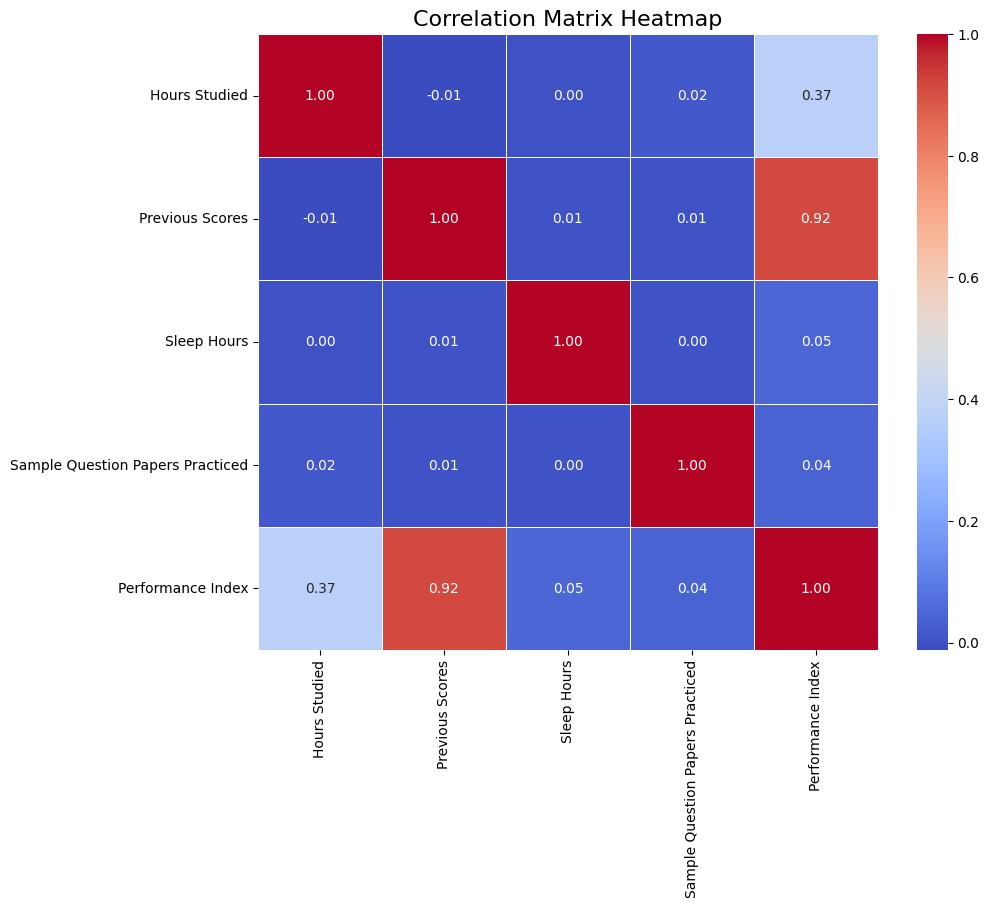

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

# Create the Heatmap
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

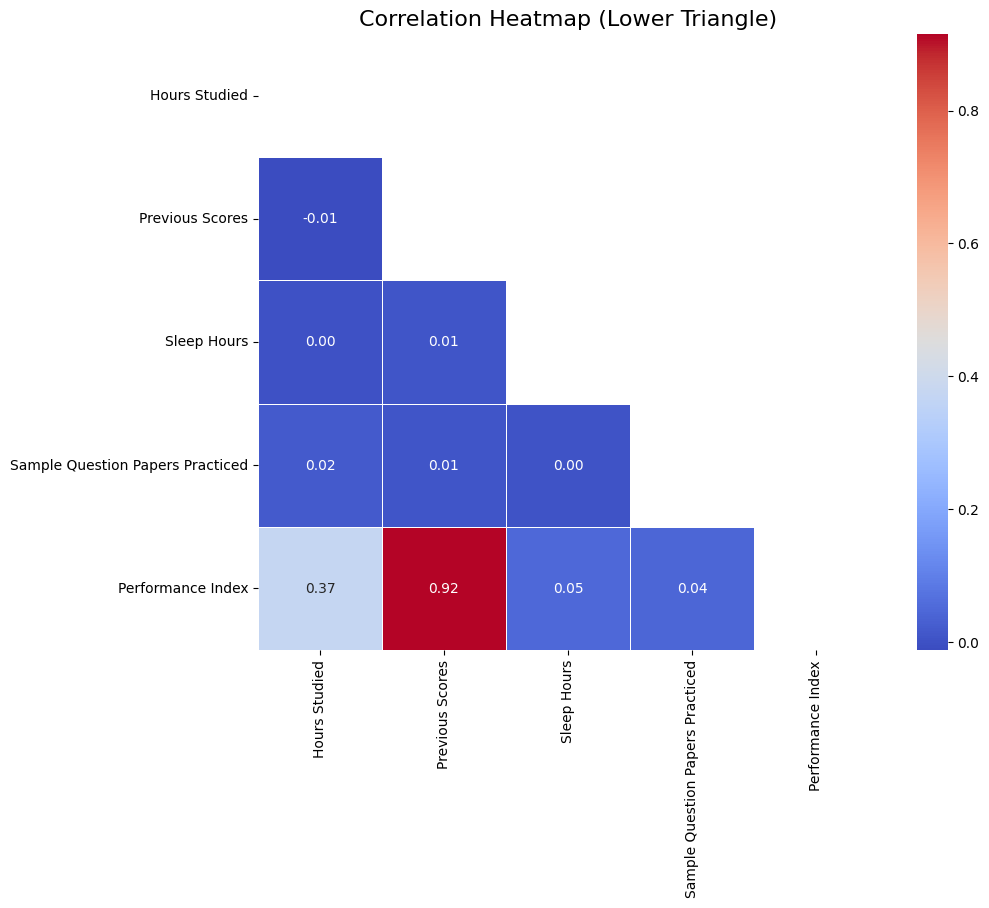

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create the Correlation Matrix
corr_mtx = df.corr(numeric_only=True)

# 2. Create the Mask
# np.triu (triangle upper) returns True for the upper triangle
mask = np.triu(np.ones_like(corr_mtx, dtype=bool))

# 3. Plot with Mask
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mtx, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap (Lower Triangle)', fontsize=16)
plt.show()